# Fake News Classification

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as ptx
import seaborn as sns

# NLP and Text Processing
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import FreqDist

# Machine Learning Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Visualization and Plotting (Additional)
import plotly.subplots as sp
import pydot
import graphviz



In [3]:
# Read csv file 
dataset = pd.read_csv("WELFake_Dataset.csv")

# Shows first five rows of dataset
dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


## Exploratory data analysis

In [4]:
dataset.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

###  Inspect ratio of real and fake news in our dataset

In [5]:
# Inspecting ratio of genuine to deceptive news in our dataset
custom_labels = dataset.label
print(f'Ratio of genuine and deceptive news:')
custom_labels.value_counts(normalize=True).rename({0: 'Deceptive', 1: 'Genuine'})

Ratio of genuine and deceptive news:


label
Genuine      0.514404
Deceptive    0.485596
Name: proportion, dtype: float64

###  Drop extra unnamed coloumn

In [6]:
dataset.drop('Unnamed: 0', axis = 1, inplace = True)
dataset.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


###  Fill Missing value 

title    558
text      39
label      0
dtype: int64


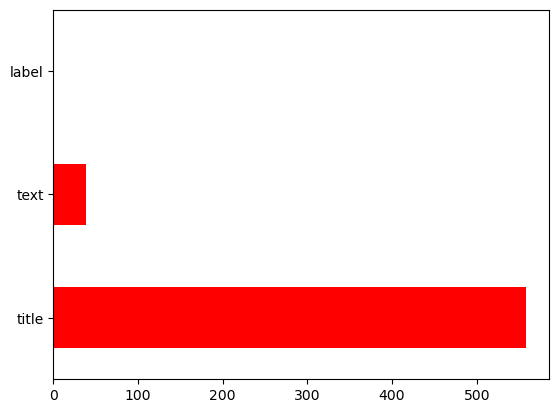

In [7]:
# Get count of missing values in each feature
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

# Plot the proportion of missing values in the dataset
missing_values_count.plot(kind="barh", color='red')
plt.show()

In [8]:
#dropping the NAN values
dataset = dataset.dropna()


In [9]:
# Combine 'title' and 'text' columns into a new column 'merged'
dataset['merged'] = dataset['title'] + ' ' + dataset['text']

# Calculate the length of words in the 'merged' column, excluding spaces 
dataset["words_length"] = dataset["merged"].apply(lambda w: len(w) - w.count(" "))

# Display the first few rows of the modified dataset
dataset.head()

,title,text,label,merged,words_length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


###  Exploring the trend in article length and news category

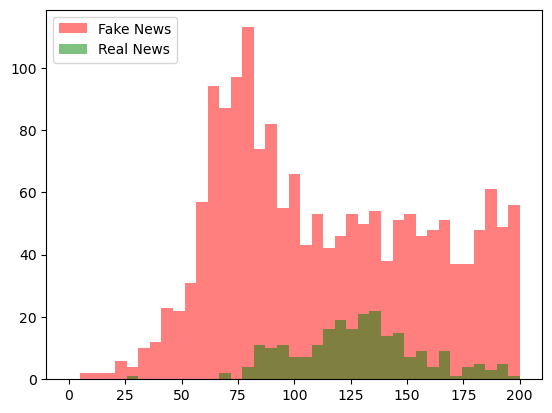

In [10]:
# Plot histograms of words_length for both Fake and Real news
plt.hist(dataset[dataset["label"] == 1]["words_length"], np.linspace(0, 200, 40), alpha=0.5, label="Fake News", color="red")
plt.hist(dataset[dataset["label"] == 0]["words_length"], np.linspace(0, 200, 40), alpha=0.5, label="Real News", color="green")

# Add legend to the plot indicating the categories
plt.legend(loc="upper left")

# Display the histogram
plt.show()


###  Word Cloud for titles

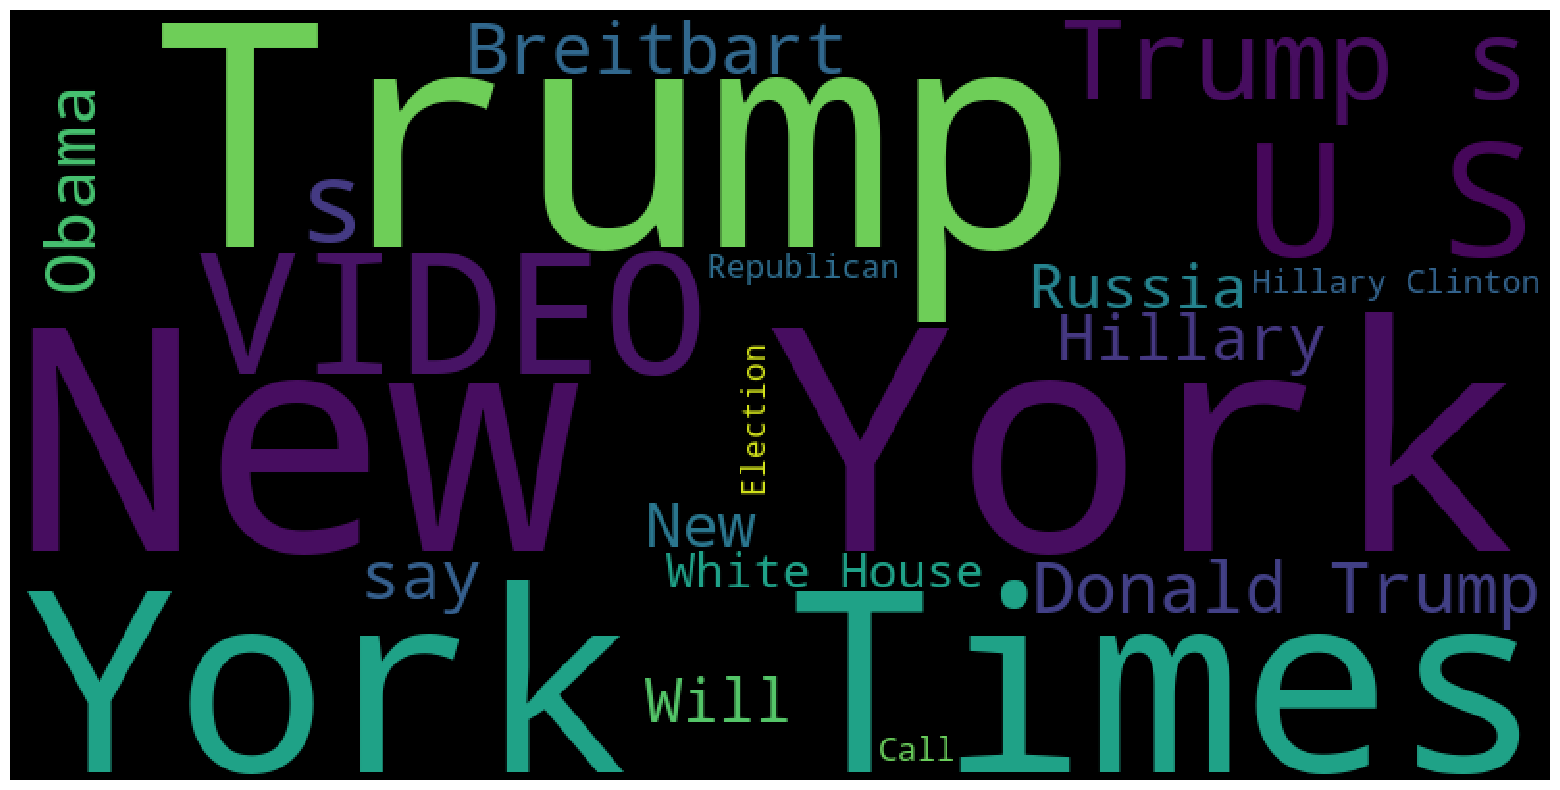

In [11]:
# Concatenate all titles into a single string
all_titles_concatenated = ' '.join(title for title in dataset['title'])

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(
    background_color='black', 
    max_words=20,
    width=800, 
    height=400,
).generate(all_titles_concatenated)

# Display the WordCloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()

#### The visual representation above reveals a predominant focus on words associated with politics. This observation aligns with expectations, considering that politics constitutes the primary subject matter evident in the plot. 

###  Word cloud for real and fake news articles

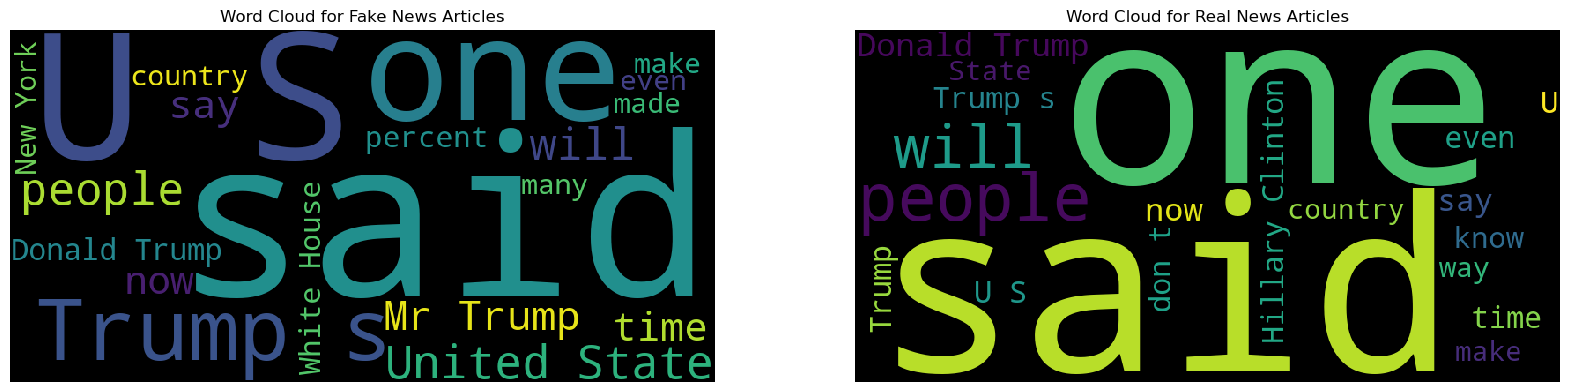

In [12]:
# Splitting the data into independent features and the target variable
features = dataset['title']
labels = dataset['label']

# Extracting text fields based on the index for fake and real articles
fake_texts = ' '.join(dataset[dataset['label'] == 0]['text'])
real_texts = ' '.join(dataset[dataset['label'] == 1]['text'])

# Generating word clouds for the top 20 words in fake articles
fake_wordcloud = WordCloud(background_color='black', max_words=20, width=800, height=400).generate(fake_texts)

# Generating word clouds for the top 20 words in real articles
real_wordcloud = WordCloud(background_color='black', max_words=20, width=800, height=400).generate(real_texts)

# Plotting fake news word cloud
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='nearest')
plt.axis("off")
plt.title("Word Cloud for Fake News Articles")

# Plotting real news word cloud
plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='nearest')
plt.axis("off")
plt.title("Word Cloud for Real News Articles")

plt.show()

#### Plotting a word cloud of fake and actual news reveals that the terms "Trump" and "white house" are frequently used in fake articles. 

In [13]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD


# Download required resources
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Define preprocessing functions
def tokenize(text):
    return word_tokenize(text.lower())

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# Create custom transformer
class TextPreprocessor:
    def transform(self, X, **transform_params):
        return [' '.join(lemmatize(remove_stopwords(tokenize(text)))) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self

# Define the pipeline
pipeline = Pipeline([
    ('text_preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),  # Needed because TF-IDF returns a sparse matrix
    ('dim_reducer', TruncatedSVD(n_components=100))
])


In [14]:
processed_features = pipeline.fit_transform(features)


## Data preprocessing

###  Split the dataset in train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    processed_features,
    labels,
    test_size=0.2,    
    random_state=42   
)

## Modeling 

### 2. Logistic Regression

In [16]:
logreg_classifier_model = LogisticRegression(max_iter=100000)

# Train the classifier
logreg_classifier_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_classifier_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      7081
           1       0.80      0.77      0.78      7227

    accuracy                           0.78     14308
   macro avg       0.78      0.78      0.78     14308
weighted avg       0.78      0.78      0.78     14308



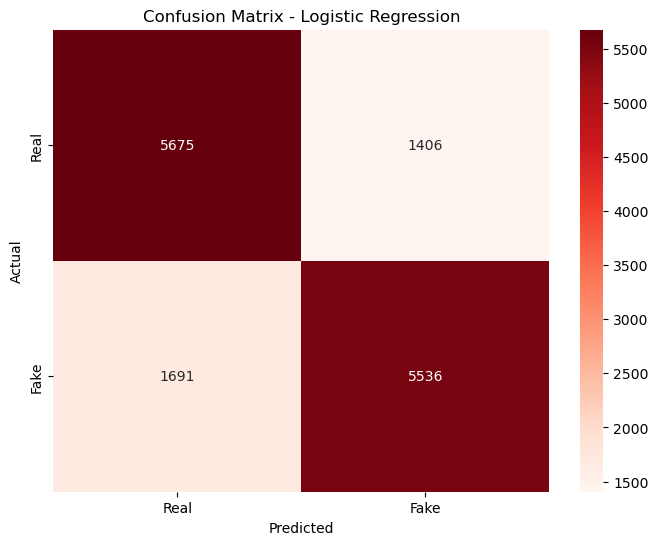

In [17]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 3. Support Vector Machine 

In [18]:
# Initialize the Support Vector Machines classifier
svm_classifier_model = SVC(kernel='linear')

# Train the classifier
svm_classifier_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_svm:.2f}")
 
# Display classification report for support vector machine
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      7081
           1       0.80      0.77      0.79      7227

    accuracy                           0.79     14308
   macro avg       0.79      0.79      0.79     14308
weighted avg       0.79      0.79      0.79     14308



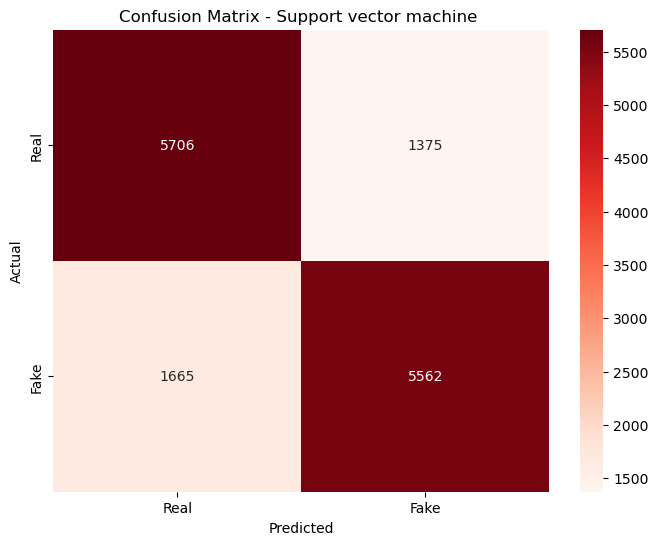

In [19]:
# Calculate confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support vector machine ')
plt.show()

### 4. Random Forest Classifier

In [20]:
# Define the parameter grid to try different estimators
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100]
}

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Initialize GridSearchCV and we select scoring as "accuracy"
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Performing grid search
grid_search.fit(X_train, y_train)

# Finding best estimator
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print best estimator
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100}


In [21]:
# Implement random forest using best estimator
rf_classifier_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=10)

# Fit data on classifier
rf_classifier_best.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier_best.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

# Display classification report for random forest algorithm
print("Classification Report - Random Forest Algorithm:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Classification Report - Random Forest Algorithm:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7081
           1       0.84      0.89      0.87      7227

    accuracy                           0.86     14308
   macro avg       0.86      0.86      0.86     14308
weighted avg       0.86      0.86      0.86     14308



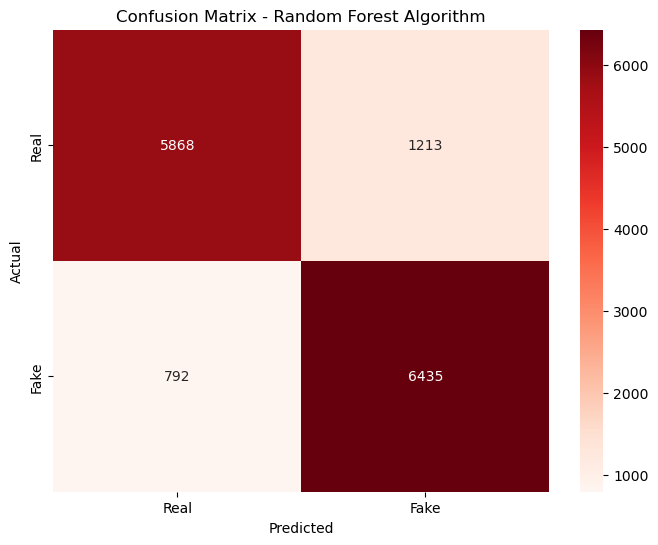

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Algorithm')
plt.show()

### Final Results: 

In [23]:

print(f"Accuracy - Logistic regression: {accuracy_lr:.2f}")
print(f"Accuracy - Support Vector Machine: {accuracy_svm:.2f}")
print(f"Accuracy - Random Forest Algorithm: {accuracy_rf:.2f}")


Accuracy - Logistic regression: 0.78
Accuracy - Support Vector Machine: 0.79
Accuracy - Random Forest Algorithm: 0.86


### Summary